In [1]:
%reload_ext autoreload
%autoreload 2

import numpy as np
import qutip as qt
import scipy as sp
from scipy import linalg
import matplotlib
import matplotlib.pylab as plt
import krotov
import os.path
import random
from matplotlib import rc
from cycler import cycler
import time
import pandas as pd
from Ps_library import *
from Hamiltonian_library import *
from config import *
rc('font',**{'family':'serif','serif':['Computer Modern'], 'size':25})
rc('text', usetex=True)

# Simple testing with non-physical systems

In [2]:
kets = [qt.basis(2,i) for i in range(2)]
e_ops = [qt.ket2dm(ket) for ket in kets]
H = hbar*qt.Qobj([[0,0],[0,10]])
c_ops = [np.sqrt(0.5)*qt.Qobj([[0,1],[0,0]])]
#c_ops = []
tlist = np.linspace(0,100,1000)
result = qt.mesolve(H,kets[1],tlist,e_ops=e_ops, c_ops=c_ops)

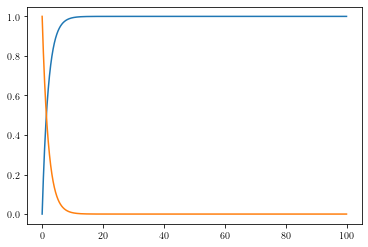

In [3]:
plt.plot(tlist,result.expect[0])
plt.plot(tlist,result.expect[1])

# Preliminary testing with the Ps system

In [16]:
system = Ps_system()

rate = 1
#system.c_ops = np.sqrt(rate)*np.asarray([system.kets[-1]*system.kets[n].dag() for n in range(system.N_bins)])

flip_pulse = {"rabi0" : 2*np.pi*(3000e-3), "detuning": 0,"chirp" : 2*np.pi*(4000e-3),"pulse_duration" : 1,"unit_wavevector":1,"start":0,"end":3,"notch":1e-6}
flip_pulse["label"] = "laser"+str(1)
system.init_pulse(flip_pulse)
system.init_pulse_cycle()

#system.init_distribution_singular()
system.init_distribution_constant()
#system.init_MBdistribution()
system.init_states_ground()
#system.init_states_desymmetrized()
system.set_Hamiltonian_MT_dissipation()
system.evolve()

TypeError: Incompatible Qobj shapes

In [24]:
# Testing how to create a new axis

arr = np.asarray([[1,0],[0,1]])
arr2 = np.insert(arr,2,[0,0],0)
arr3 = np.insert(arr2,2,[0,0,1],1)
print("arr2=\n",arr2)
print("arr3=\n",arr3)


arr2=
 [[1 0]
 [0 1]
 [0 0]]
arr3=
 [[1 0 0]
 [0 1 0]
 [0 0 1]]


In [44]:
system = Ps_system(isDissipative=True)
flip_pulse = {"rabi0" : 2*np.pi*(3000e-3), "detuning": 0,"chirp" : 2*np.pi*(4000e-3),"pulse_duration" : 1,"unit_wavevector":1,"start":0,"end":3,"notch":1e-6}
flip_pulse["label"] = "laser"+str(1)
system.init_pulse(flip_pulse)
system.init_pulse_cycle()

system.init_distribution_constant()
system.init_states_general(internal_state_arr=np.asarray([[1,0,0],[0,0,0],[0,0,0]]))
#system.set_Hamiltonian_MT()
system.evolve()

10.8%. Run time:   6.64s. Est. time left: 00:00:00:54
21.6%. Run time:   6.71s. Est. time left: 00:00:00:24
32.4%. Run time:   6.79s. Est. time left: 00:00:00:14
40.5%. Run time:   6.85s. Est. time left: 00:00:00:10
51.4%. Run time:   6.91s. Est. time left: 00:00:00:06
62.2%. Run time:   6.98s. Est. time left: 00:00:00:04
70.3%. Run time:   7.03s. Est. time left: 00:00:00:02
81.1%. Run time:   7.09s. Est. time left: 00:00:00:01
91.9%. Run time:   7.16s. Est. time left: 00:00:00:00
Total run time:   7.20s


ValueError: x and y must have same first dimension, but have shapes (250,) and (0,)

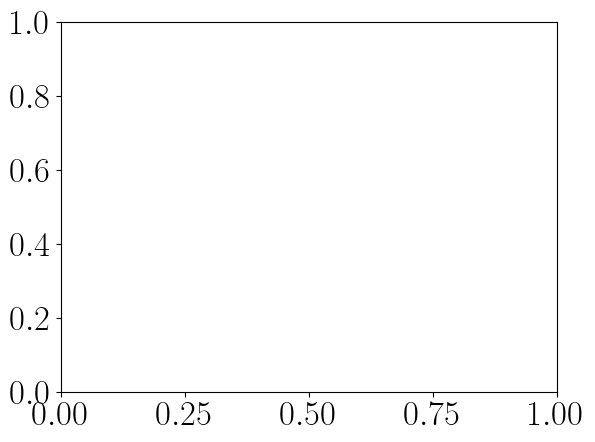

In [48]:
plt.plot(system.velocity_bins,system.saved_expect[0][500:750])
plt.show()